# 布朗运动与重味夸克的随机行走

庞龙刚@华中师范大学

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

plt.style.use(['science', 'notebook', 'no-latex'])

## 布朗运动

1827年，英国植物学家 R.Brown 观察到花粉在水中的运动，确信它既不是液体的流动，也不是受风的影响。

1880s，有人猜测花粉是受到了周围水分子的碰撞才产生了无轨的 Brown 运动。

但当时物质由微观粒子（分子）组成的猜想还未得到验证。

1905年，爱因斯坦使用随机行走理论解释了 Brown 运动, $\langle x^2 \rangle = 2 D t$

1908年，J.B. Perrin 用黄藤粒子在水中的运动位移观察数据，证实了理论计算 $D = {k_B T \over \gamma} = {k_B T \over 6\pi r_0 \eta}$, 其中 $T$ 是系统温度，$r_0$ 是 Brown 粒子半径，$\eta$ 是流体的黏度。

Perrin 第一次从实验上证明了原子、分子的存在。

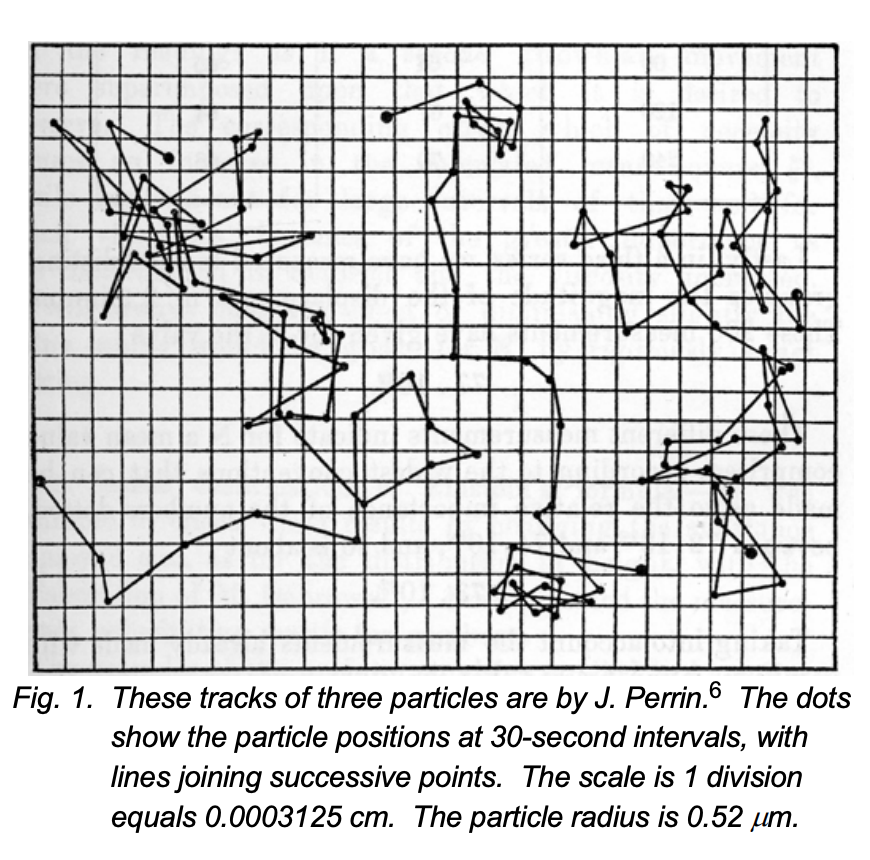

In [21]:
# 参考文献：
Image("images/perrin_brown_motion.png", height=600)

当时爱因斯坦推导时使用了 1 维随机行走，

1. 令 t=0 时刻，花粉在 x = 0
2. 每受一次碰撞后位移可以是 $\Delta x= l$，也可以是 $ \Delta x= -l$
3. 计算 n 个时间步后，花粉位移的均值 $\langle x \rangle$, 以及位移平方的均值 $\langle x^2 \rangle$


计算时假设 $n_+$ 个时间步向 x 的正向，$n_-$ 个时间步向 x 的负向，则总的正向步数为 $m= n_+ - n_-$, 

n 给定时，总的不同的走法为 $2^n$；$n_+$ 和 $n_-$ 给定时，不同的走法有 $C_n^{n_+}$, 所以，

\begin{align}
p_n(m) &= {C_n^{n_+} \over 2^n} = {n! \over 2^n n_+! n_-!} \\
\end{align}

根据 $n = n_+ + n_-$ 和 $m = n_+ - n_-$ 可以将上面式子中的$n_+,n_-$ 替换为，$n_+ = {n+m\over 2}$, $n_- = {n-m\over 2}$。

根据 $p_n(m)$ 求 $\langle m \rangle = \sum_m p_n(m) m $ 和  $\langle m^2 \rangle = \sum_m p_n(m) m^2$ 是 Einstein 此次推导的主要任务。

使用蒙特卡洛模拟可以很快帮他找到答案！

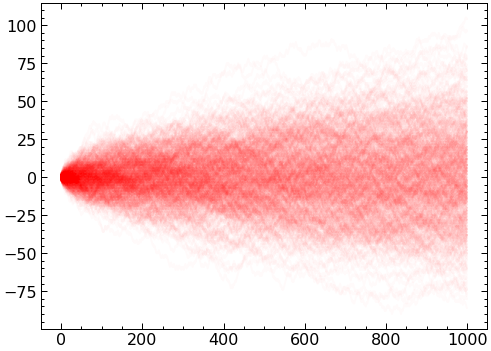

In [40]:
def random_walk(nsteps=1000, ntracks=10000):
    r = 2 * np.random.rand(nsteps, ntracks) - 1
    walk = np.where(r > 0, 1, -1)
    x = np.cumsum(walk, axis=0)
    return x

x = random_walk()

_ = plt.plot(x[:, :500], color='r', alpha=0.02)

Text(0, 0.5, '$\\langle m \\rangle$')

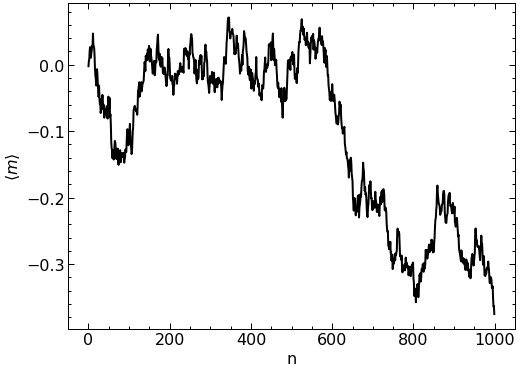

In [32]:
# 位移的均值 <x> = 0

x_mean = np.mean(x, axis=1)

plt.plot(x_mean, 'k')
plt.xlabel("n")
plt.ylabel(r"$\langle m \rangle$")

Text(0, 0.5, '$\\langle m^2 \\rangle$')

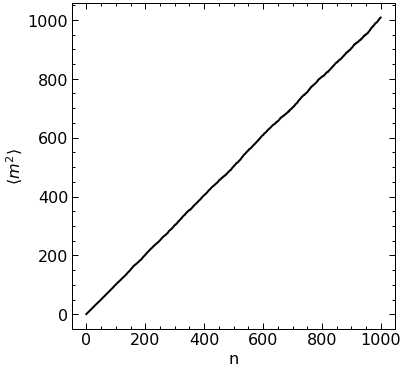

In [33]:
# 位移平方的均值 <x^2> = n*l
x2_mean = np.mean(x*x, axis=1)

plt.plot(x2_mean, 'k')
plt.gca().set_aspect('equal')
plt.xlabel("n")
plt.ylabel(r"$\langle m^2 \rangle$")

## 参考文献

【1】[实验观察布朗运动](https://uwaterloo.ca/chem13news/sites/ca.chem13news/files/uploads/files/may06_2006_page_14.pdf)

【2】计算化学：从理论化学到分子模拟